In [1]:
import tensorflow as tf
import keras
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Pre-trained MobileNetV2 model
## Load pre-trained model
model = tf.keras.applications.MobileNetV2(include_top=True, weights='imagenet')

## Freeze pre-trained layers
for layer in model.layers:
  layer.trainable = False

# Add a new layers
new_layer = tf.keras.layers.Dense(3)
model = tf.keras.Model(inputs=model.inputs, outputs=new_layer(model.outputs[-1]))

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002), loss=tf.keras.losses.SparseCategoricalCrossentropy())

14536120/14536120 [==============================] - 0s 0us/step


In [4]:
# Load and preprocess the image data
image_path = '/content/drive/Shareddrives/Capstone C23-PR505/Machine Learning/cat.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))
image = image.astype(np.float32) / 255.0
image = np.expand_dims(image, axis=0)

In [5]:
# Testing MobileNetV2 model
predictions = model.predict(image)
r = (predictions[0][0])
g = (predictions[0][1])
b = (predictions[0][2])

1/1 [==============================] - 1s 785ms/step


In [6]:
# RGB Values
rgb_data = {
  'Red': [round(r + np.mean(image[:, :, :, 0]) * 255)],
  'Green': [round(g + np.mean(image[:, :, :, 1]) * 255)],
  'Blue': [round(b + np.mean(image[:, :, :, 2]) * 255)]
}
df = pd.DataFrame(rgb_data)
print(df)

   Red  Green  Blue
0  187    141   108


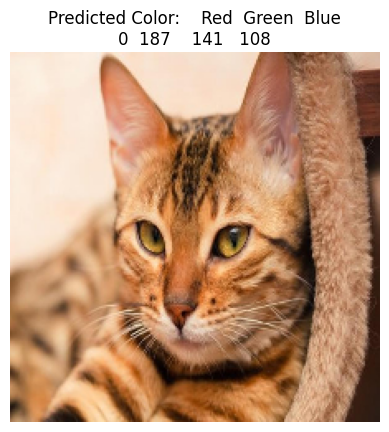

In [7]:
# Display the image and predicted color
plt.imshow(image[0])
plt.axis('off')
plt.title(f'Predicted Color: {df}')
plt.show()

In [8]:
# Save the model
model.save('batik_co_rgb_model.h5')
print('Model saved.')

Model saved.


In [9]:
# Exporting to TFLite
export_dir = 'saved_model/1/'
tf.saved_model.save(model, export_dir = export_dir)

In [10]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert();

In [12]:
import pathlib

tflite_model_file = pathlib.Path('saved_model/1//model.tflite')
tflite_model_file.write_bytes(tflite_model)

3787088